In [163]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision',2)
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20,.5f}'.format)

plt.style.use('seaborn')

In [164]:
weatherHistory = pd.read_csv('datasets/weatherHistory.csv')
weatherHistory = weatherHistory.dropna()
weatherHistory = weatherHistory.drop_duplicates()
weatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222,7.38889,0.89000,14.11970,251.00000,15.82630,0.00000,"1,015.13000",Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.35556,7.22778,0.86000,14.26460,259.00000,15.82630,0.00000,"1,015.63000",Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.37778,9.37778,0.89000,3.92840,204.00000,14.95690,0.00000,"1,015.94000",Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.28889,5.94444,0.83000,14.10360,269.00000,15.82630,0.00000,"1,016.41000",Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.75556,6.97778,0.83000,11.04460,259.00000,15.82630,0.00000,"1,016.51000",Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.01667,26.01667,0.43000,10.99630,31.00000,16.10000,0.00000,"1,014.36000",Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58333,24.58333,0.48000,10.09470,20.00000,15.55260,0.00000,"1,015.16000",Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.03889,22.03889,0.56000,8.98380,30.00000,16.10000,0.00000,"1,015.66000",Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52222,21.52222,0.60000,10.52940,20.00000,16.10000,0.00000,"1,015.95000",Partly cloudy starting in the morning.


In [165]:
weatherHistory.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [166]:
weatherHistory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [167]:
weatherHistory.shape

(95912, 12)

In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
weatherHistory['Summary'] = le.fit_transform(weatherHistory['Summary'])
weatherHistory['Precip Type'] = le.fit_transform(weatherHistory['Precip Type'])
weatherHistory['Daily Summary'] = le.fit_transform(weatherHistory['Daily Summary'])
weatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,0,9.47222,7.38889,0.89000,14.11970,251.00000,15.82630,0.00000,"1,015.13000",197
1,2006-04-01 01:00:00.000 +0200,19,0,9.35556,7.22778,0.86000,14.26460,259.00000,15.82630,0.00000,"1,015.63000",197
2,2006-04-01 02:00:00.000 +0200,17,0,9.37778,9.37778,0.89000,3.92840,204.00000,14.95690,0.00000,"1,015.94000",197
3,2006-04-01 03:00:00.000 +0200,19,0,8.28889,5.94444,0.83000,14.10360,269.00000,15.82630,0.00000,"1,016.41000",197
4,2006-04-01 04:00:00.000 +0200,17,0,8.75556,6.97778,0.83000,11.04460,259.00000,15.82630,0.00000,"1,016.51000",197
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,0,26.01667,26.01667,0.43000,10.99630,31.00000,16.10000,0.00000,"1,014.36000",170
96449,2016-09-09 20:00:00.000 +0200,19,0,24.58333,24.58333,0.48000,10.09470,20.00000,15.55260,0.00000,"1,015.16000",170
96450,2016-09-09 21:00:00.000 +0200,19,0,22.03889,22.03889,0.56000,8.98380,30.00000,16.10000,0.00000,"1,015.66000",170
96451,2016-09-09 22:00:00.000 +0200,19,0,21.52222,21.52222,0.60000,10.52940,20.00000,16.10000,0.00000,"1,015.95000",170


In [169]:
weatherHistory.describe()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,"95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000","95,912.00000"
mean,16.01551,0.11169,11.93797,10.85919,0.73484,10.80676,187.50699,10.36231,0.00000,"1,003.14696",129.42650
std,4.35423,0.31498,9.56962,10.71671,0.19572,6.92050,107.37831,4.17420,0.00000,117.29148,56.25336
min,0.00000,0.00000,-21.82222,-27.71667,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,17.00000,0.00000,4.59444,2.27222,0.60000,5.81210,116.00000,8.35590,0.00000,"1,011.89000",95.00000
50%,18.00000,0.00000,12.02222,12.02222,0.78000,9.93370,180.00000,10.04640,0.00000,"1,016.42000",118.00000
75%,19.00000,0.00000,18.84444,18.84444,0.89000,14.13580,290.00000,14.81200,0.00000,"1,021.05000",181.00000
max,26.00000,1.00000,39.90556,39.34444,1.00000,63.85260,359.00000,16.10000,0.00000,"1,046.38000",213.00000


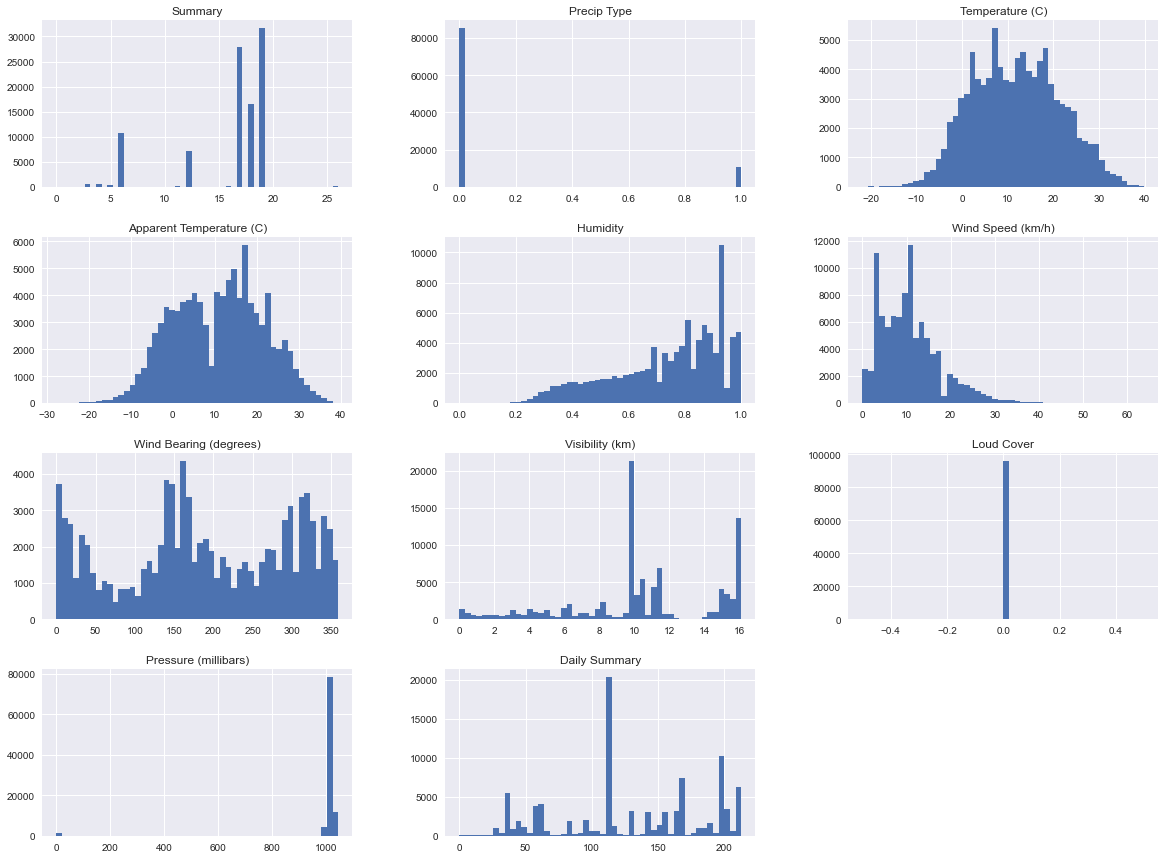

In [170]:
weatherHistory.hist(bins=50, figsize=(20,15))
plt.show()

In [171]:
weatherHistory.corr()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,1.00000,-0.11701,0.14626,0.14240,-0.11269,0.00271,0.02332,0.13578,NaN,0.14456,0.15694
Precip Type,-0.11701,1.00000,-0.56353,-0.56609,0.23266,-0.06788,-0.04211,-0.31649,NaN,0.00928,-0.25188
Temperature (C),0.14626,-0.56353,1.00000,0.99263,-0.63222,0.00866,0.02984,0.39381,NaN,-0.00529,0.43936
Apparent Temperature (C),0.14240,-0.56609,0.99263,1.00000,-0.60246,-0.05706,0.02885,0.38268,NaN,-0.00007,0.43429
Humidity,-0.11269,0.23266,-0.63222,-0.60246,1.00000,-0.22470,0.00077,-0.37062,NaN,0.00538,-0.36903
Wind Speed (km/h),0.00271,-0.06788,0.00866,-0.05706,-0.22470,1.00000,0.10448,0.10085,NaN,-0.04943,-0.00348
Wind Bearing (degrees),0.02332,-0.04211,0.02984,0.02885,0.00077,0.10448,1.00000,0.04889,NaN,-0.01164,0.05380
Visibility (km),0.13578,-0.31649,0.39381,0.38268,-0.37062,0.10085,0.04889,1.00000,NaN,0.06101,0.45946
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.14456,0.00928,-0.00529,-0.00007,0.00538,-0.04943,-0.01164,0.06101,NaN,1.00000,0.05489


In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lm = LinearRegression(fit_intercept=True)

X, y = weatherHistory.loc[:,['Summary', 'Precip Type', 'Temperature (C)',
       'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']],weatherHistory['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=3)

In [173]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    
    return {'model':regr,'RSS':RSS}

In [174]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results =[]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p],X_train, y_train, X_test, y_test))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [175]:
models_train = pd.DataFrame(columns=['RSS','model'])

predictors = []

for i in range(1,len(X.columns)+1):
    models_train.loc[i] = forward(predictors,X_train,y_train,X_test,y_test)
    predictors = models_train.loc[i]['model'].model.exog_names

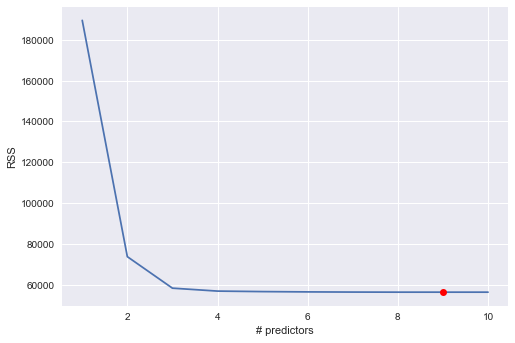

In [176]:
plt.plot(models_train['RSS'])
plt.xlabel('# predictors')
plt.ylabel('RSS')
plt.plot(models_train['RSS'].argmin(), models_train['RSS'].min(), 'or');

In [177]:
predictors

['Temperature (C)',
 'Wind Speed (km/h)',
 'Pressure (millibars)',
 'Precip Type',
 'Summary',
 'Visibility (km)',
 'Wind Bearing (degrees)',
 'Daily Summary',
 'Humidity',
 'Loud Cover']

In [178]:
X, y = weatherHistory.loc[:,['Temperature (C)', 'Wind Speed (km/h)','Pressure (millibars)','Precip Type']],weatherHistory['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=42)

lm_fit = lm.fit(X_train,y_train)

lm_predict = lm_fit.predict(X_test)

print('Intercept: ',lm_fit.intercept_)
print(pd.Series(lm_fit.coef_, index=X.columns))
print('MSE: ',mean_squared_error(y_test,lm_predict))

Intercept:  -1.298910345662252
Temperature (C)                     1.10212
Wind Speed (km/h)                  -0.10329
Pressure (millibars)                0.00018
Precip Type                        -0.54080
dtype: float64
MSE:  1.1894993403908067


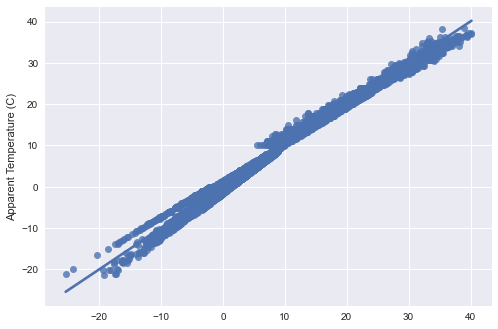

In [179]:
sns.regplot(x=lm_predict,y=y_test);